# SVM :- Forestfires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Check out the Data

In [5]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\SVM\forestfires.csv')


### EDA

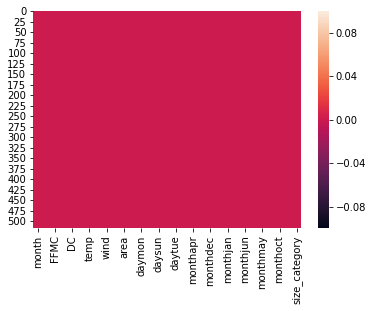

In [6]:
sns.heatmap(df.isnull())

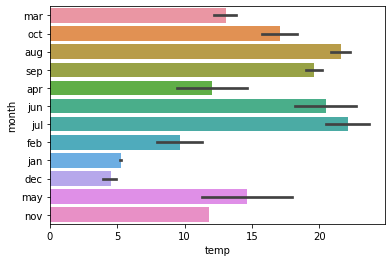

In [7]:
sns.barplot(x= df.temp,y=df.month,data=df)

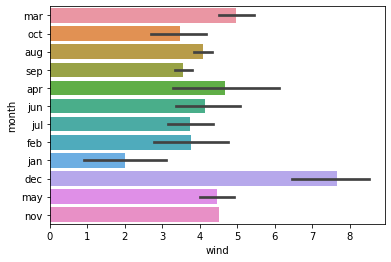

In [8]:
sns.barplot(x= df.wind,y=df.month,data=df)

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <a list of 10 Patch objects>)

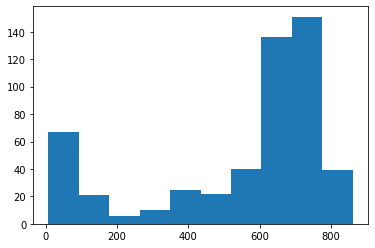

In [9]:
plt.hist(df.DC)

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <a list of 10 Patch objects>)

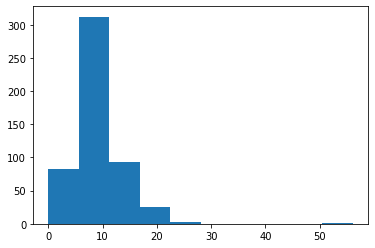

In [10]:
plt.hist(df.ISI)

In [11]:
df.value_counts('month')

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [13]:
df['y'] = lb.fit_transform(df['size_category'])


In [14]:
df = df.drop('day',axis=1)


In [15]:
df = df.drop('size_category',axis=1)

In [16]:
df = pd.get_dummies(df)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [19]:
from sklearn.svm import SVC
model = SVC()


In [20]:
model.fit(X_train,y_train)

SVC()

### GridSearch

In [21]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'poly']} 


In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1

[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 52   0]
 [  3 116]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.97      0.99       119

    accuracy                           0.98       171
   macro avg       0.97      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



In [28]:
print('Accurcy: ',np.mean(grid_predictions==y_test)*100)

Accurcy:  98.24561403508771
